# Proyecto 01

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
proyecto_data = np.load('./data/proyecto_training_data.npy')

In [4]:
proyecto_data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [5]:
type(proyecto_data)

numpy.ndarray

In [11]:
data_train, data_test = train_test_split(proyecto_data, test_size=0.2)

In [12]:
len(data_train)

1168

In [13]:
len(data_test)

292

In [16]:
df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)

In [17]:
df_train.describe()

,0,1,2,3,4,5
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,955.000000
mean,182259.994863,6.125000,1168.430651,6.536815,1971.895548,69.330890
std,82101.461325,1.394613,393.995901,1.638864,30.069689,24.296419
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129800.000000,5.000000,881.500000,5.000000,1954.000000,59.000000
50%,164500.000000,6.000000,1092.000000,6.000000,1974.000000,68.000000
75%,215000.000000,7.000000,1414.500000,7.000000,2001.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1168 non-null   float64
 1   1       1168 non-null   float64
 2   2       1168 non-null   float64
 3   3       1168 non-null   float64
 4   4       1168 non-null   float64
 5   5       955 non-null    float64
dtypes: float64(6)
memory usage: 54.9 KB


In [24]:
np.ptp(data_train, axis=0)

array([7.201e+05, 9.000e+00, 4.358e+03, 1.200e+01, 1.380e+02,       nan])

In [18]:
df_test.describe()

,0,1,2,3,4,5
count,292.000000,292.000000,292.000000,292.000000,292.000000,246.000000
mean,175566.000000,5.996575,1139.410959,6.441781,1968.756849,72.841463
std,67633.165732,1.332899,355.101741,1.570793,30.653576,24.085462
min,55000.000000,3.000000,372.000000,3.000000,1880.000000,21.000000
25%,131300.000000,5.000000,892.500000,5.000000,1950.750000,60.000000
50%,160000.000000,6.000000,1058.500000,6.000000,1969.000000,70.000000
75%,204925.000000,7.000000,1344.250000,7.000000,1999.000000,80.000000
max,465000.000000,10.000000,3138.000000,12.000000,2009.000000,174.000000


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       292 non-null    float64
 1   1       292 non-null    float64
 2   2       292 non-null    float64
 3   3       292 non-null    float64
 4   4       292 non-null    float64
 5   5       246 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [25]:
np.ptp(data_test, axis=0)

array([4.100e+05, 7.000e+00, 2.766e+03, 9.000e+00, 1.290e+02,       nan])

<Axes: xlabel='4', ylabel='Count'>

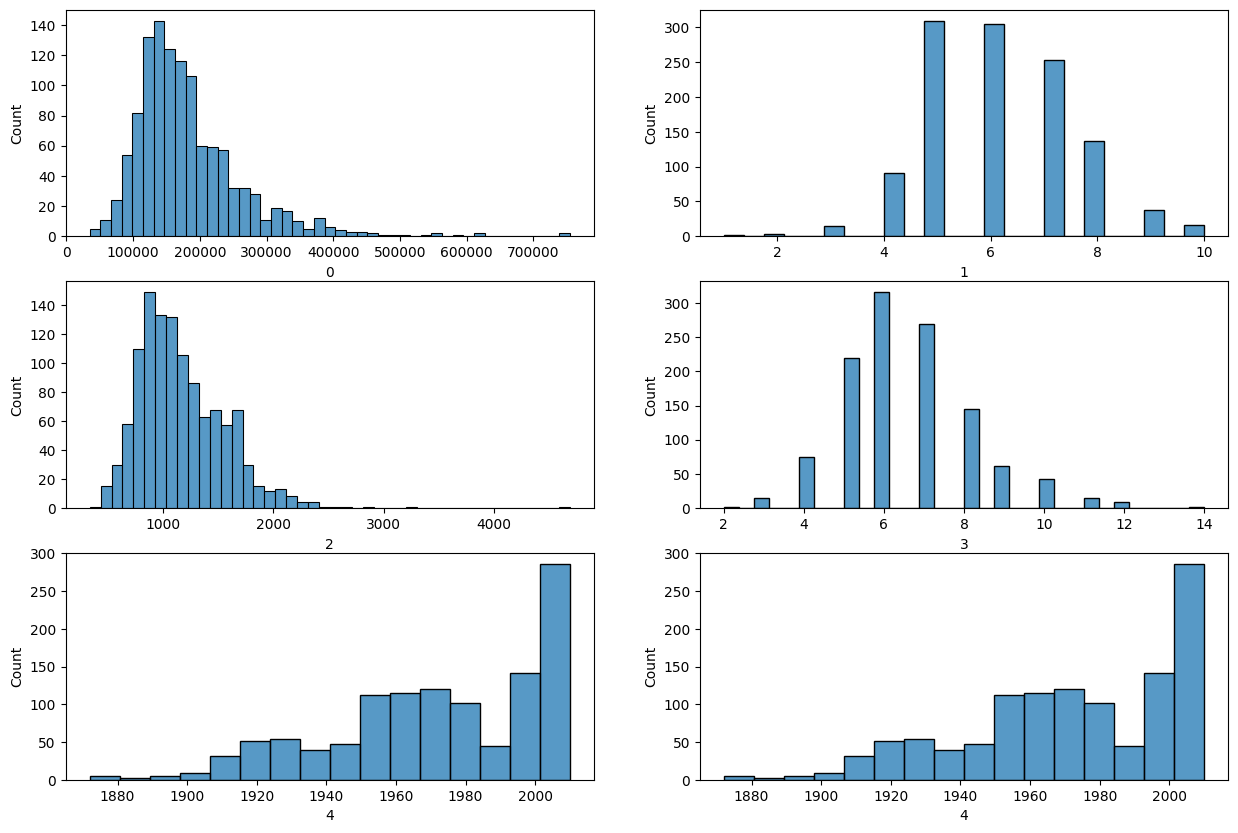

In [59]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.histplot(data=df_train[0], ax=axes[0,0])
sns.histplot(data=df_train[1], ax=axes[0,1])
sns.histplot(data=df_train[2], ax=axes[1,0])
sns.histplot(data=df_train[3], ax=axes[1,1])
sns.histplot(data=df_train[4], ax=axes[2,0])
sns.histplot(data=df_train[4], ax=axes[2,1])